# nCoV-2019
<img src='https://ars.els-cdn.com/content/image/3-s2.0-B9780443073670000409-f040-001-9780443073670.jpg'>

<b>Overview:</b> <br>
Model the growth of the nCoV-2019 Corona Virus infections in mainland China and outside the mainland.

<b>Data Source:</b> <br>
https://en.m.wikipedia.org/wiki/Timeline_of_the_2019–20_Wuhan_coronavirus_outbreak <br>
http://www.nhc.gov.cn/xcs/yqtb/list_gzbd.shtml <br>
https://www.thelancet.com/pb-assets/Lancet/pdfs/S0140673620302117.pdf <br>
Clinical outcome (99 Cases)
<li> Remained in hospital 57 (58%)
<li> Discharged 31 (31%)
<li> Died 11 (11%)

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jan 28 08:19:13 2020

"""
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

#import packages
import pandas as pd
import numpy as np
import xlrd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from tabulate import tabulate
from matplotlib import style
from matplotlib.pylab import rcParams
style.use('fivethirtyeight')
#style.use('ggplot')


In [2]:
df_xls=pd.read_excel(r'Corona.xlsx')

#Eliminating sparse data
df=df_xls[7:]

In [3]:
df=df.reset_index(drop=True)

In [4]:
df

,Date,Cases Suspected,Cases Confirmed,Deaths,Recovered,Quarantined,Quarantined & Released,Total,Source,Cases Confirm Outside China
0,2020.01.15,NaN,41.0,2.0,7.0,119.0,644.0,763.0,[10],NaN
1,2020.01.16,NaN,45.0,2.0,12.0,98.0,665.0,763.0,[11],NaN
2,2020.01.17,NaN,62.0,2.0,15.0,82.0,681.0,763.0,[12],NaN
3,2020.01.18,NaN,121.0,2.0,19.0,NaN,NaN,NaN,NaN,NaN
4,2020.01.19,NaN,198.0,3.0,25.0,90.0,727.0,817.0,[13],4.0
5,2020.01.20,54.0,291.0,6.0,25.0,922.0,817.0,1739.0,[14][15],6.0
6,2020.01.21,37.0,440.0,9.0,25.0,1394.0,765.0,2159.0,[16],8.0
7,2020.01.22,257.0,571.0,17.0,25.0,4928.0,969.0,5897.0,[17],14.0
8,2020.01.23,1072.0,830.0,25.0,34.0,8420.0,1087.0,9507.0,[18],25.0
9,2020.01.24,1965.0,1287.0,41.0,38.0,13967.0,1230.0,15197.0,[19],40.0


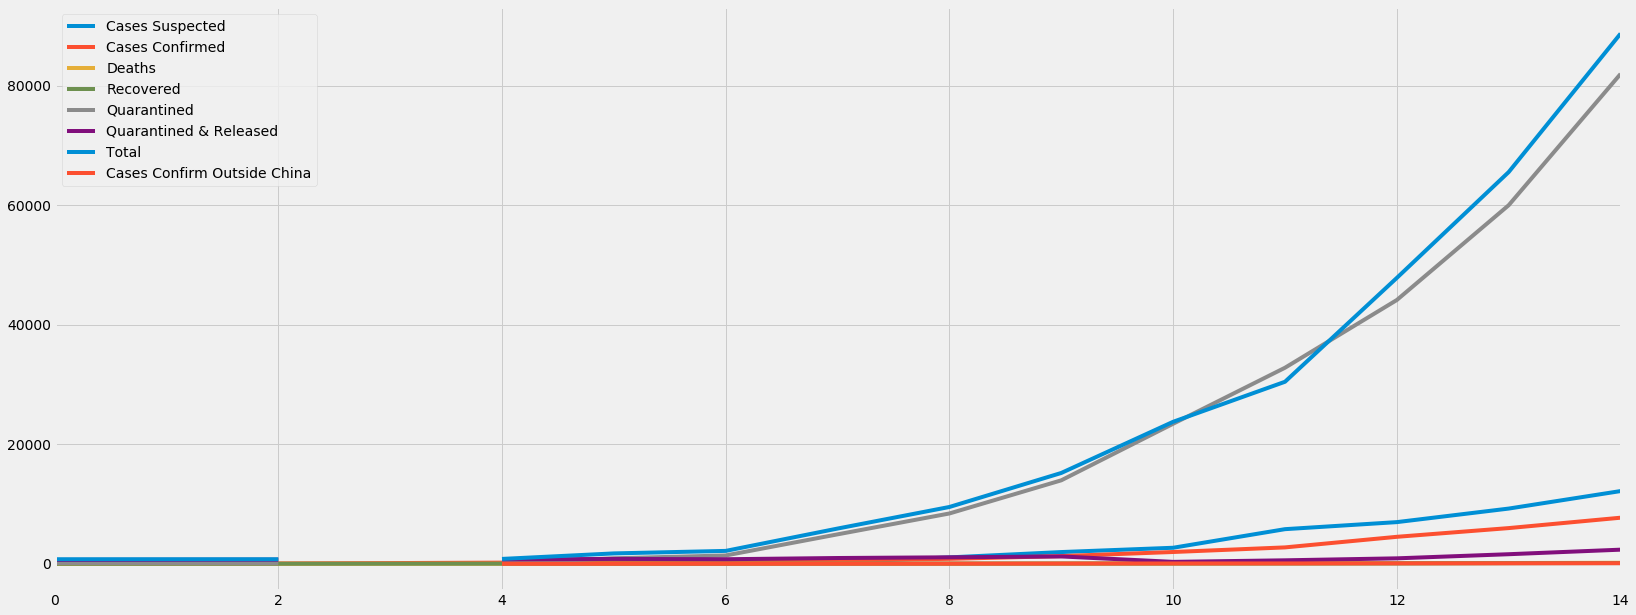

In [5]:
rcParams['figure.figsize'] = 25,10
df.plot()

CONFIRMED CASES in China


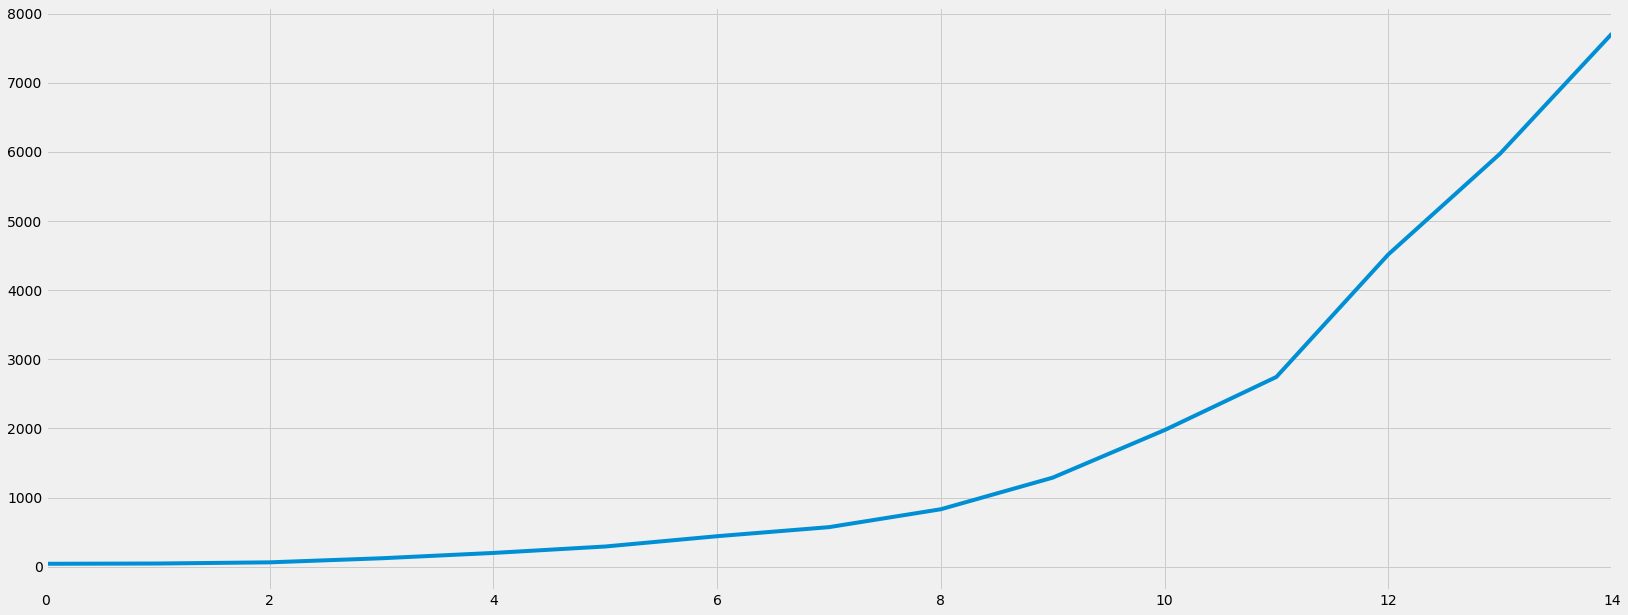

In [6]:
df_cc = df['Cases Confirmed']
print('CONFIRMED CASES in China')
df_cc.plot()

RECOVERIES vs. FATALITIES


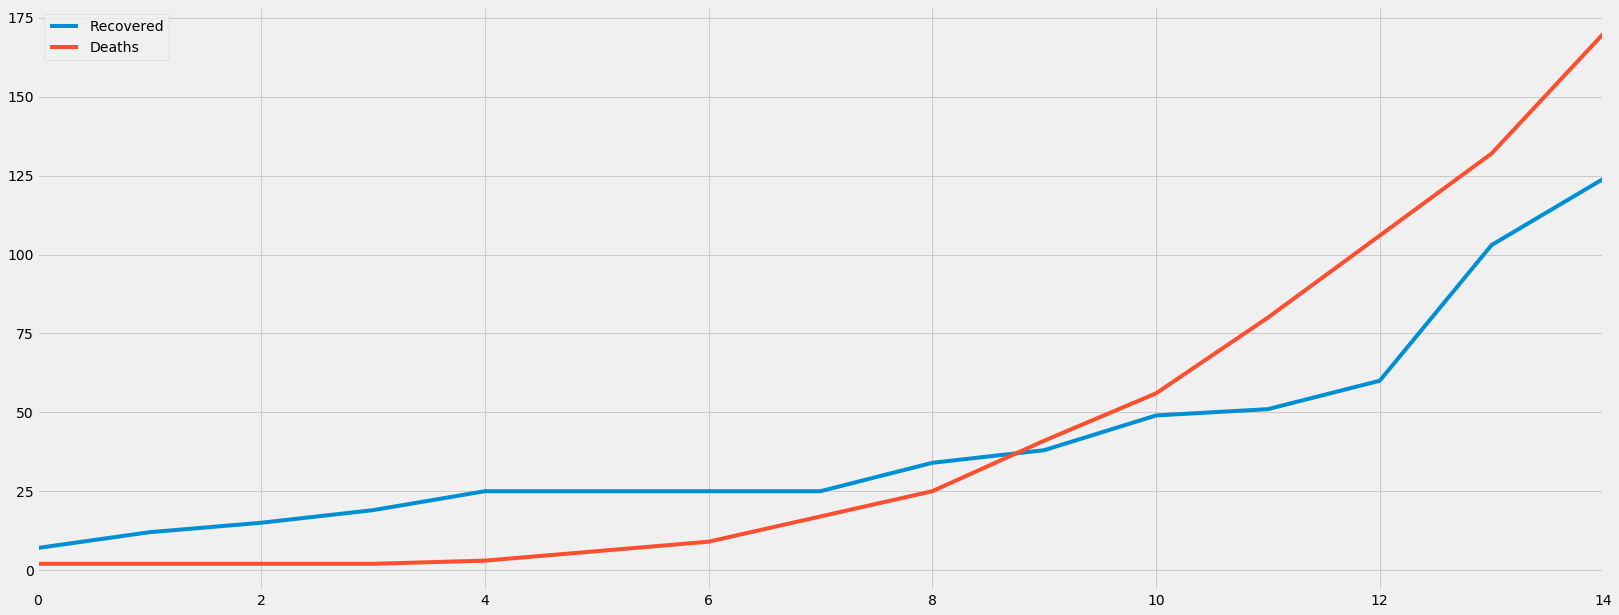

In [7]:
df_d = df['Deaths']
df_r = df['Recovered']
print('RECOVERIES vs. FATALITIES')
df_r.plot()
df_d.plot()
plt.legend()
plt.show()

In [8]:
def exponential_fit(x, a, b, c):
    return a*np.exp(b*x) + c

def linear_fit(x, m, c):
    return (m*x) + c

In [9]:
def proj(dat, no, d=75000):
    n=no
    data = dat
    y=np.array(dat)
    x=np.array(dat.index)
    
    #Fit Data
    #Dropped the last data point in the fit, and used it as a test for the fit
    fitting_parameters, covariance = curve_fit(exponential_fit, x[:n], y[:n])
    a, b, c = fitting_parameters
    print('a = ',a)
    print('b = ',b)
    print('c = ',c)
    
    print('Next predicted data point {:,.0f}'.format(exponential_fit(n, a, b, c)))
   
    #Plot Curve Fit with Data 
    x_min = 0  
    x_max = 25
    y_min = 0
    y_max = d
    x_fit = np.linspace(x_min, x_max, 100)   
    plt.plot(x, y, 'o', markersize = 15, label = 'Actuals')
    plt.plot(x_fit, exponential_fit(x_fit, *fitting_parameters), '--', label='Fit')

    plt.axis([x_min, x_max, y_min, y_max])
    plt.legend()
    plt.show()

CONFIRMED CASES
***************
a =  86.28765212835367
b =  0.3245573337609999
c =  -150.02749552090265
Next predicted data point 11,077


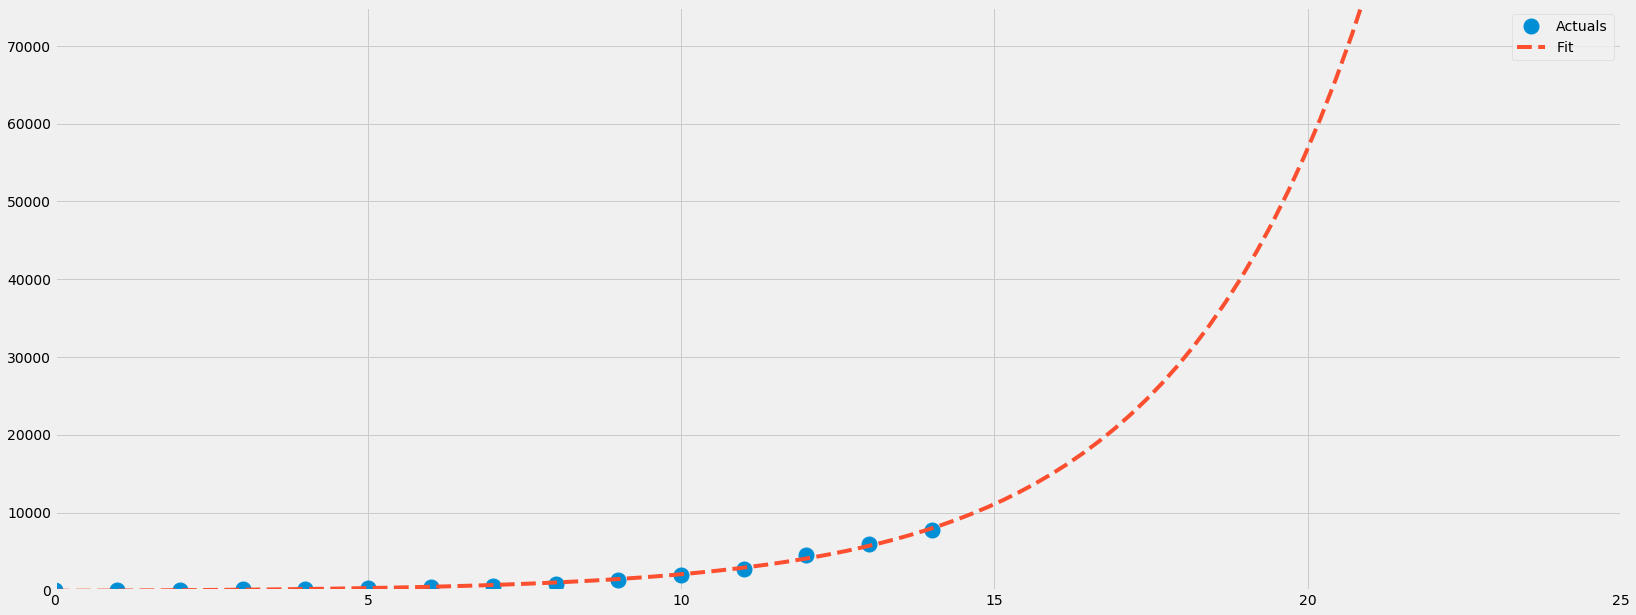

In [10]:
# test_data = 1
points = 0
length = df_cc.count()
n = length - points
print('CONFIRMED CASES')
print('***************')
proj(df_cc,n)

CONFIRMED CASES outside Mainland China
**************************************


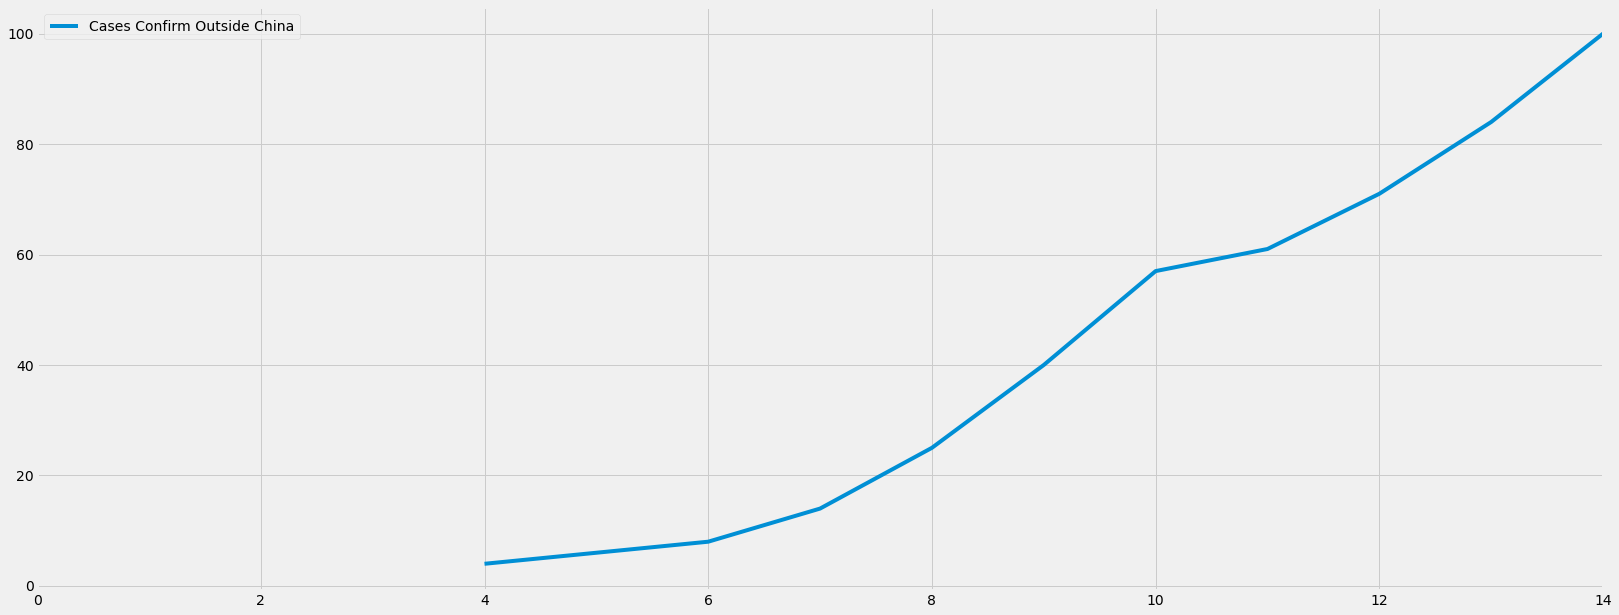

In [11]:
df_cco = df['Cases Confirm Outside China']
print('CONFIRMED CASES outside Mainland China')
print('**************************************')
df_cco.plot()
plt.legend()
plt.show()

In [12]:
df_cco=df_cco.fillna(0)

CONFIRMED CASES outside Mainland China - Exponential Model
**********************************************************
a =  13.34200952687341
b =  0.15854159209741808
c =  -19.324951501212137
Next predicted data point 125


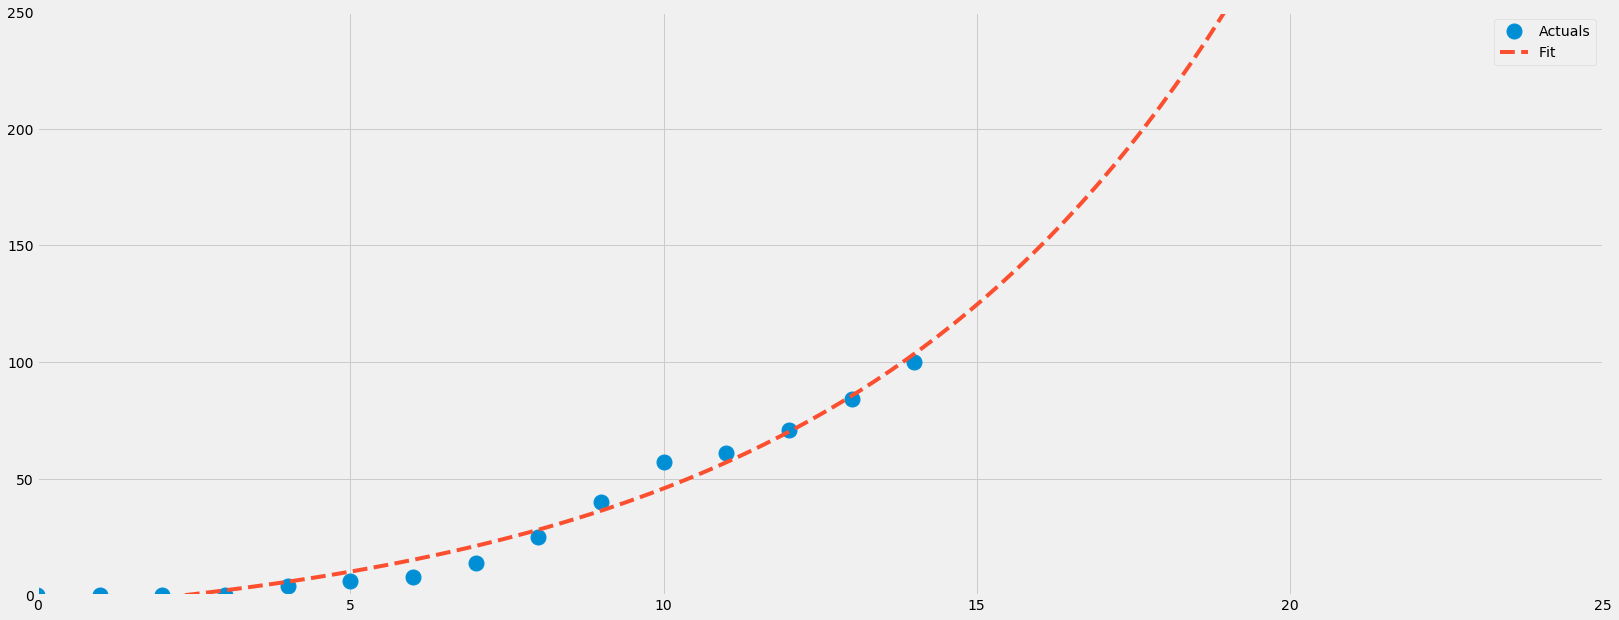

In [13]:
# test_data = 1
points = 0
length = df_cco.count()
n = length - points
print('CONFIRMED CASES outside Mainland China - Exponential Model')
print('**********************************************************')
proj(df_cco,n,250)

In [14]:
def proj_lin(dat, no, d=5000):
    n=no
    data = dat
    y=np.array(dat)
    x=np.array(dat.index)
    #Fit Data
    #Dropped the last data point in the fit, and used it as a test for the fit
    fitting_parameters, covariance = curve_fit(linear_fit, x[:n], y[:n])
    m, c = fitting_parameters
    print('m = ',m)
    print('c = ',c)
    print('Next predicted data point {:,.0f}'.format(linear_fit(n+1, m, c)))
    
    #Plot Curve Fit with Data 
    x_min = 0  
    x_max = 25
    y_min = 0
    y_max = d
    x_fit = np.linspace(x_min, x_max, 100)   
    plt.plot(x, y, 'o', markersize = 15, label = 'Actuals')
    plt.plot(x_fit, linear_fit(x_fit, *fitting_parameters), '--', label='Fit')

    plt.axis([x_min, x_max, y_min, y_max])
    plt.legend()
    plt.show()
    

CONFIRMED CASES outside Mainland China - LinearModel
****************************************************
m =  7.310714285728051
c =  -19.84166666671214
Next predicted data point 97


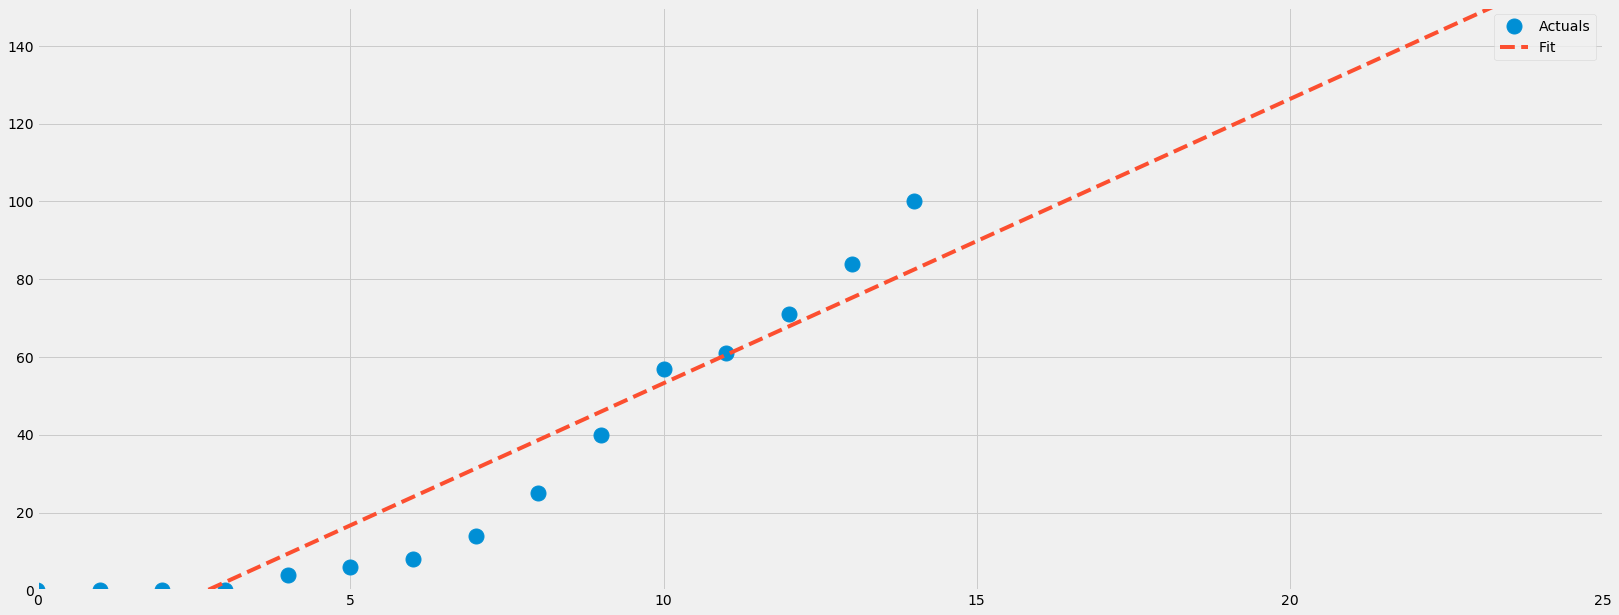

In [15]:
# test_data = 1
points = 0
length = df_cco.count()
n = length - points
print('CONFIRMED CASES outside Mainland China - LinearModel')
print('****************************************************')
proj_lin(df_cco,n,150)

NOTE: Exponential Model is better fit than the Linear Model

FATALITIES
**********
a =  4.611323940068547
b =  0.26249565303712025
c =  -7.9682428231148625
Next predicted data point 229


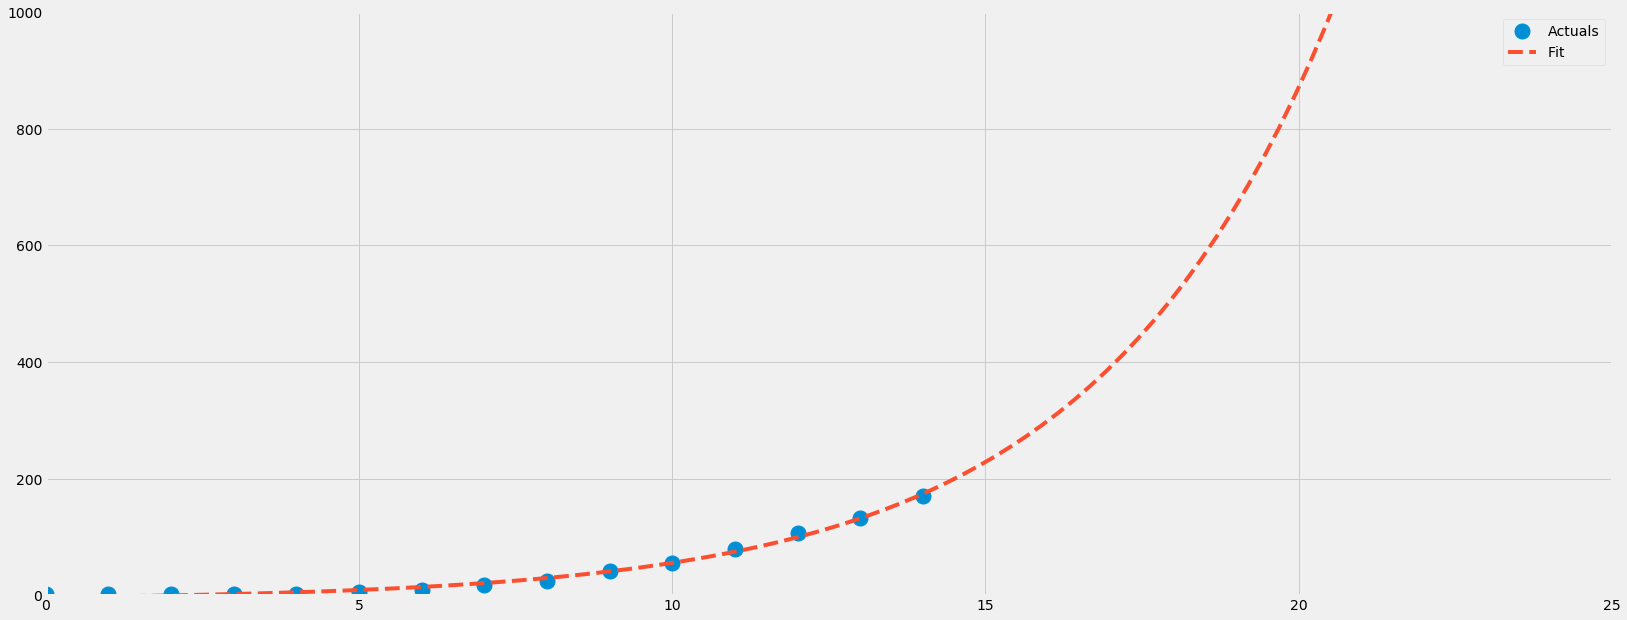

In [16]:
# test_data = 1
points = 0
length = df_d.count()
print('FATALITIES')
print('**********')
n = length - points
proj(df_d,n, 1000)

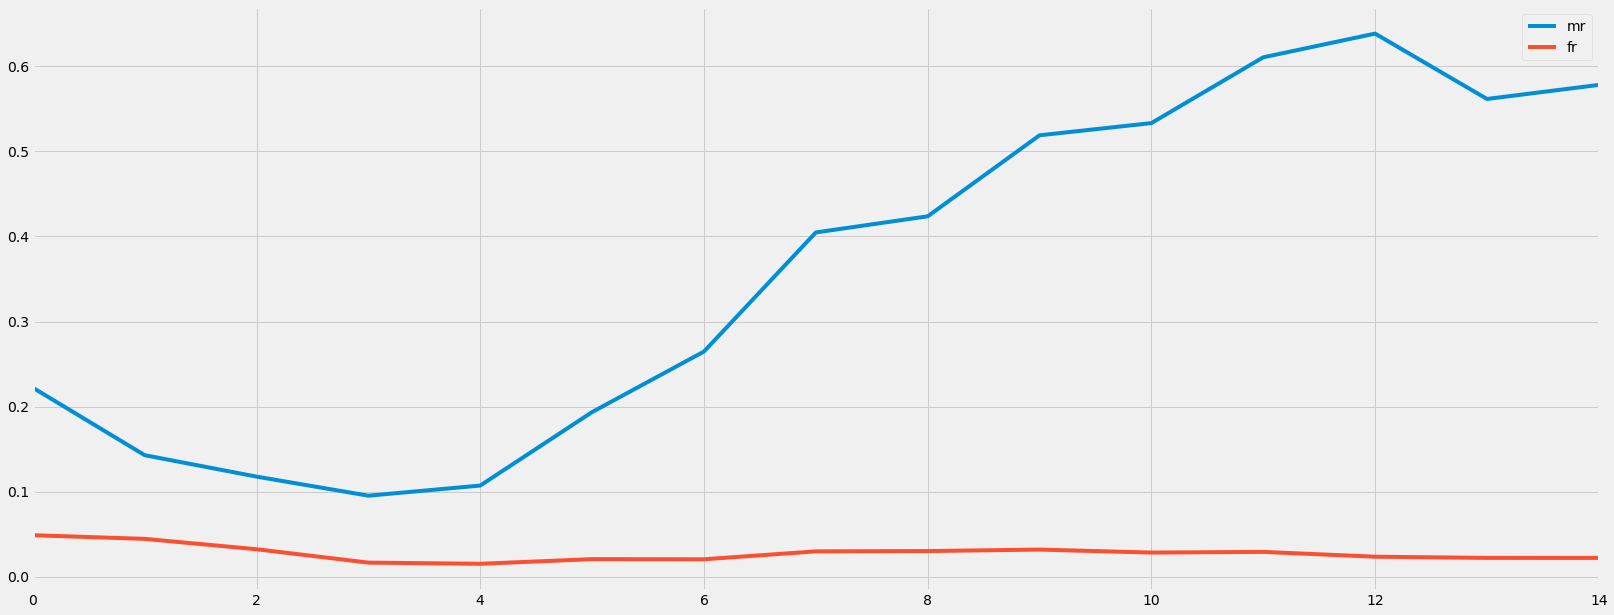

In [17]:
# MR % = Fatalities / (Fatalities + Recovered)

df['mr'] = df.Deaths/(df.Deaths + df.Recovered)
print()
df.mr.plot()


# FR % = Fatalities / Confirmed Cases

df['fr'] = df.Deaths/(df['Cases Confirmed'])
df.fr.plot()
plt.legend()

plt.show()

Current:  F.R. =  2.20%
          M.R. = 56.17%
Reference [RED Dot] from Lancet Study 11.11%


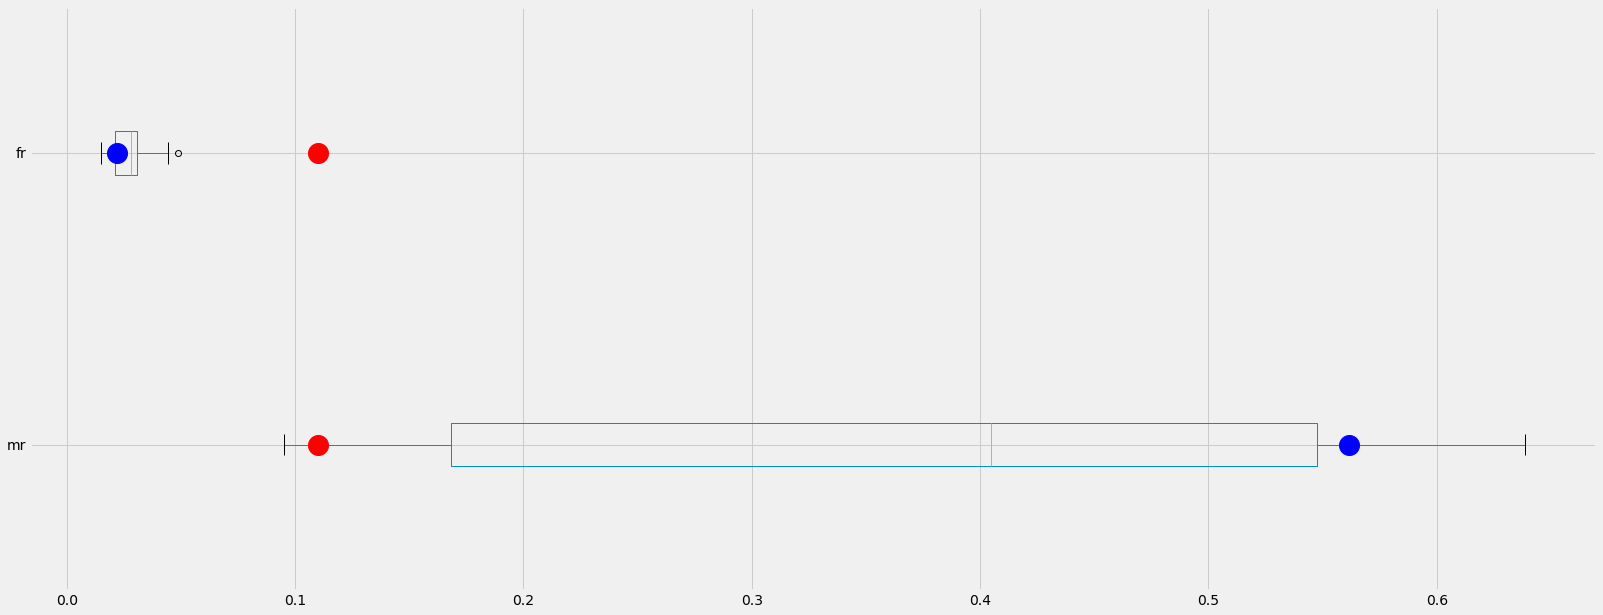

In [18]:
#Boxplots

b=df.fr[14]
print('Current:  F.R. =  {:.2%}'.format(b))
a=df.mr[13]
print('          M.R. = {:.2%}'.format(a))
print('Reference [RED Dot] from Lancet Study {:.2%}'.format(11/99))

df.boxplot(column=['mr','fr'], vert = False)
plt.plot(a, [1], marker='o', markersize=20, color="blue")
plt.plot(b, [2], marker='o', markersize=20, color="blue")
plt.plot(.11, [1], marker='o', markersize=20, color="Red")
plt.plot(.11, [2], marker='o', markersize=20, color="Red")
plt.show()

Reference Rates: https://en.wikipedia.org/wiki/List_of_human_disease_case_fatality_rates